In [67]:
%load_ext autoreload
%autoreload 2

import networkx as nx
import matplotlib.pyplot as plt
from util import dotbracket_to_graph, draw_rna_graph, get_family_to_sequences
import numpy as np
import RNA 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
family_to_sequences = get_family_to_sequences()

## Explore Number of Sequences per Family

In [46]:
sequences_per_family = np.array([len(seq) for fam, seq in family_to_sequences.items()])
print("In total there are {} sequences".format(sum(sequences_per_family)))

In total there are 2935378 sequences


In [35]:
max_family = max(family_to_sequences.keys(), key=(lambda key: len(family_to_sequences[key])))
max_family_n_sequences = len(family_to_sequences[max_family])

print("The family with most sequences is {} with {} sequences".format(max_family, max_family_n_sequences))

The family with most sequences is RF00005 with 1429585 sequences


In [40]:
print("The average number of sequences per family is {0:.0f}".format(np.mean(sequences_per_family)))
print("The median number of sequences per family is {0:.0f}".format(np.median(sequences_per_family)))

The average number of sequences per family is 973
The median number of sequences per family is 37


In [41]:
len(family_to_sequences['RF00014'])

38

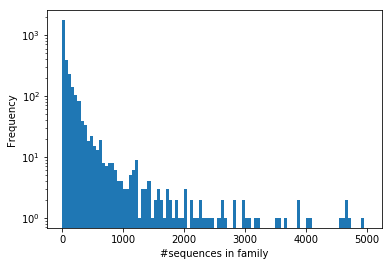

In [84]:
# hist_sequences_per_family = sequences_per_family.remove(1429585)
a = plt.hist(sequences_per_family, log=True, bins=100, range=[0, 5000])
plt.xlabel('#sequences in family')
plt.ylabel('Frequency')
plt.savefig("../plots/sequences_per_family.png")

## Explore Sequence Length

In [55]:
all_sequences = np.array(list(family_to_sequences.values()))
all_sequences = [item for sublist in all_sequences for item in sublist]

In [74]:
sum([1 if 'U' in sequence else 0 for sequence in all_sequences])

0

In [61]:
seq_lengths = [len(seq) for seq in all_sequences]

In [65]:
print("The overall mean sequence length is {0:.2f}".format(np.mean(seq_lengths)))
print("The overall median sequence length is {0:.2f}".format(np.median(seq_lengths)))
print("The overall min sequence length is {0:.2f}".format(np.min(seq_lengths)))
print("The overall max sequence length is {0:.2f}".format(np.max(seq_lengths)))

The overall mean sequence length is 133.24
The overall median sequence length is 74.00
The overall min sequence length is 1.00
The overall max sequence length is 11047.00


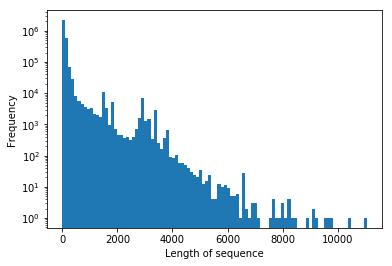

In [83]:
a = plt.hist(seq_lengths, bins=100, log=True)
plt.xlabel('Length of sequence')
plt.ylabel('Frequency')
plt.savefig("../plots/sequences_length.png")

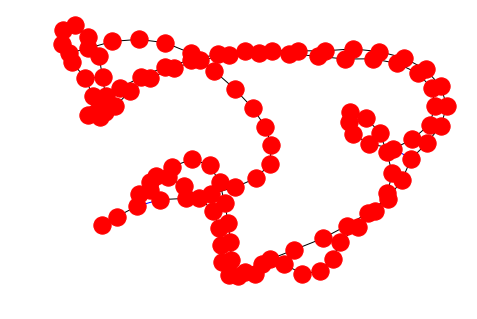

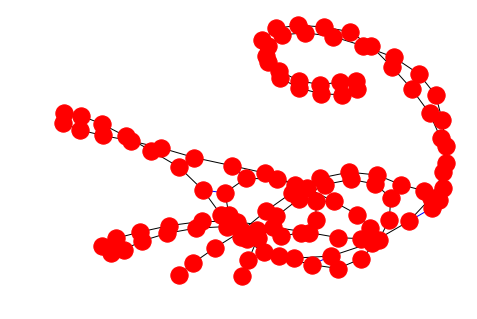

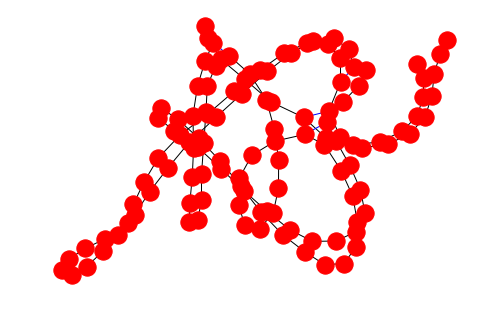

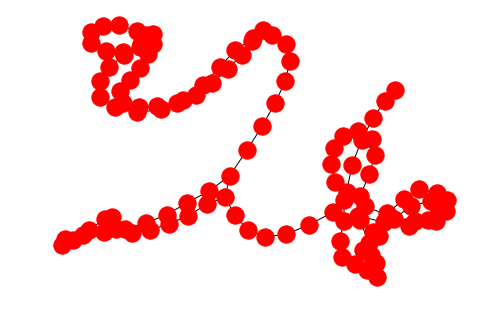

In [71]:
for seq in all_sequences[:5]:
    if len(seq) > 100 and len(seq) < 200:
        dotbracket = RNA.fold(seq)[0]
        rna_graph = dotbracket_to_graph(dotbracket)
        draw_rna_graph(rna_graph)